# STA130 Project Assignment

## Contributers:
* Ali Rahbar
* Zijun Qin

## Data Used:
- `country_indicators.csv`
- `test_predictions.csv`

## Project Objective:
> The goal of this project is to use linear regression to create an equation that can estimate error in prediction models so we can optimize the equation and help unicef improve their decision making process thoguh this work.

## Conflict Esclation
> The three machin leanring models in the project predict wheather or not a country will enter conflict esclation in the near future. A limitation we have in this project is that we do not know what the definition of conflict esclation is and thus we do not know what variables will result in the bast results. This task can be done better if conflict esclation was defined.

In [40]:
import pandas as pd
import numpy as np

df_indicators = pd.read_csv('country_indicators.csv')
print(df_indicators.shape)
df_indicators.head()

(218, 1332)


,Unnamed: 0,sowc_demographics__population-thousands-2021_total,sowc_demographics__population-thousands-2021_under-18,sowc_demographics__population-thousands-2021_under-5,sowc_demographics__annual-population-growth-rate_2000-2020,sowc_demographics__annual-population-growth-rate_2020-2030-a,sowc_demographics__annual-number-of-births-thousands-2021_2020-2030-a,sowc_demographics__total-fertility-live-births-per-woman-2021_2020-2030-a,sowc_demographics__life-expectancy-at-birth-years_1970,sowc_demographics__life-expectancy-at-birth-years_2000-0,...,fsi_e3:_human_flight_and_brain_drain,fsi_e2:_economic_inequality,fsi_e1:_economy,fsi_p1:_state_legitimacy,fsi_p2:_public_services,fsi_p3:_human_rights,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category
0,0,40099.4620,20297.8860,6490.5540,3.286824,2.325169,1440.941,4.6434,37.4178,55.2978,...,8.5,8.2,9.6,9.4,10.0,8.7,9.7,8.7,7.7,Alert
1,1,2854.7100,574.3875,141.3930,0.496681,0.248324,29.289,1.3897,64.8239,75.4043,...,8.5,2.9,6.1,5.0,3.8,3.6,4.8,6.2,5.5,Stable
2,2,44177.9685,15526.2050,4870.8425,1.642661,1.237367,950.888,2.8886,43.1597,70.4779,...,5.1,5.2,6.2,7.6,5.0,6.9,5.8,6.9,3.1,Warning
3,3,79.0340,12.7765,2.5385,0.770116,0.437249,0.567,1.1254,74.2557,80.9193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,34503.7735,17832.9760,5983.4065,3.392806,2.684447,1338.792,5.3044,40.1904,46.0236,...,5.6,8.8,8.2,8.1,8.8,6.3,6.6,7.2,4.0,Warning


### About `country_indicators.csv`:
>

In [41]:
df_predictions = pd.read_csv('test_predictions.csv')
print(df_predictions.shape)
df_predictions.head()

(364, 12)


,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,y_true_ffnn,iso3
0,202211,FJ,False,0.183897,False,False,0.066500,False,False,0.409958,False,FJI
1,202212,FJ,False,0.267831,False,False,0.099643,False,False,0.406696,False,FJI
2,202211,TZ,False,0.482585,False,True,0.704086,True,True,0.545236,False,TZA
3,202212,TZ,False,0.187792,False,True,0.638444,True,True,0.534560,False,TZA
4,202301,TZ,True,0.539319,True,True,0.608380,False,True,0.538583,True,TZA


### About `test_predictions.csv`:
>

In [42]:
df_predictions['predicts1'] = df_predictions[['y_true_transformer', 'y_true_xgboost', 'y_true_ffnn']].any(axis=1)
df_predictions['error_transformer'] = np.abs(df_predictions.y_true_transformer-df_predictions.y_pred_proba_transformer)
df_predictions['error_ffnn'] = np.abs(df_predictions.y_true_ffnn-df_predictions.y_pred_proba_ffnn)
df_predictions['error_xgboost'] = np.abs(df_predictions.y_true_xgboost-df_predictions.y_pred_proba_xgboost)
#df_predictions['fsi_rank'] = df_predictions['fsi_rank'].astype('string').str.replace(r'\D', '', regex=True).replace('', pd.NA)

df_predictions

,yearmonth,fips,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,y_true_ffnn,iso3,predicts1,error_transformer,error_ffnn,error_xgboost
0,202211,FJ,False,0.183897,False,False,0.066500,False,False,0.409958,False,FJI,False,0.183897,0.409958,0.066500
1,202212,FJ,False,0.267831,False,False,0.099643,False,False,0.406696,False,FJI,False,0.267831,0.406696,0.099643
2,202211,TZ,False,0.482585,False,True,0.704086,True,True,0.545236,False,TZA,True,0.482585,0.545236,0.295914
3,202212,TZ,False,0.187792,False,True,0.638444,True,True,0.534560,False,TZA,True,0.187792,0.534560,0.361556
4,202301,TZ,True,0.539319,True,True,0.608380,False,True,0.538583,True,TZA,True,0.460681,0.461417,0.608380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,202211,MJ,False,0.182196,False,False,0.079453,False,False,0.291874,False,MNE,False,0.182196,0.291874,0.079453
360,202212,MJ,False,0.203236,False,False,0.060189,False,False,0.300321,False,MNE,False,0.203236,0.300321,0.060189
361,202211,TD,True,0.527107,False,True,0.697625,True,False,0.335496,False,TTO,True,0.527107,0.335496,0.302375
362,202212,TD,True,0.555677,False,True,0.729246,False,False,0.324000,False,TTO,False,0.555677,0.324000,0.729246


### Adding Geographic Features
In the demo code, there are two categorical variables `fips` and `iso` that are omitted. The main reason is that although they are categorical data, the number of unique features are huge, in which they may not provide useful information. To make use of this, we can convert them into **Geographic** features - latitude and longitude.

In [43]:
import geopandas as gpd
import warnings

warnings.filterwarnings("ignore")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['centroid'] = world['geometry'].centroid
world['latitude'] = world['centroid'].y
world['longitude'] = world['centroid'].x
country_coords = world[['iso_a3', 'latitude', 'longitude']]
country_coords.rename(columns={'iso_a3': 'iso3'}, inplace=True)
country_coords

,iso3,latitude,longitude
0,FJI,-17.316309,163.853165
1,TZA,-6.257732,34.752990
2,ESH,24.291173,-12.137831
3,CAN,61.469076,-98.142381
4,USA,45.705628,-112.599436
...,...,...,...
172,SRB,44.233037,20.819652
173,MNE,42.789040,19.286182
174,-99,42.579367,20.895356
175,TTO,10.428237,-61.330367


> In this section we are merging all the dataframes together to create a nice dataframe we can use to train our model. Some text values that counld have not been used in linear regression have also been droped.

In [44]:
df_raw = df_predictions.merge(df_indicators, left_on='iso3', right_on='iso3', how='inner').merge(country_coords, left_on='iso3', right_on='iso3', how='inner')

df_raw.drop('iso3',axis='columns', inplace=True)
df_raw.drop('Unnamed: 0',axis='columns', inplace=True)
df_raw.drop('fips',axis='columns', inplace=True)
df_raw.drop('fsi_rank',axis='columns', inplace=True)

print(df_raw.shape)
df_raw

(364, 1345)


,yearmonth,y_pred_transformer,y_pred_proba_transformer,y_true_transformer,y_pred_xgboost,y_pred_proba_xgboost,y_true_xgboost,y_pred_ffnn,y_pred_proba_ffnn,y_true_ffnn,...,fsi_e1:_economy,fsi_p1:_state_legitimacy,fsi_p2:_public_services,fsi_p3:_human_rights,fsi_c1:_security_apparatus,fsi_c2:_factionalized_elites,fsi_x1:_external_intervention,fsi_category,latitude,longitude
0,202211,False,0.183897,False,False,0.066500,False,False,0.409958,False,...,7.5,6.1,4.2,5.4,6.4,8.2,6.6,Warning,-17.316309,163.853165
1,202212,False,0.267831,False,False,0.099643,False,False,0.406696,False,...,7.5,6.1,4.2,5.4,6.4,8.2,6.6,Warning,-17.316309,163.853165
2,202211,False,0.482585,False,True,0.704086,True,True,0.545236,False,...,6.2,6.9,8.4,5.6,4.6,6.5,6.0,Warning,-6.257732,34.752990
3,202212,False,0.187792,False,True,0.638444,True,True,0.534560,False,...,6.2,6.9,8.4,5.6,4.6,6.5,6.0,Warning,-6.257732,34.752990
4,202301,True,0.539319,True,True,0.608380,False,True,0.538583,True,...,6.2,6.9,8.4,5.6,4.6,6.5,6.0,Warning,-6.257732,34.752990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,202211,False,0.182196,False,False,0.079453,False,False,0.291874,False,...,5.8,3.9,3.8,2.9,4.0,6.5,6.3,Stable,42.789040,19.286182
360,202212,False,0.203236,False,False,0.060189,False,False,0.300321,False,...,5.8,3.9,3.8,2.9,4.0,6.5,6.3,Stable,42.789040,19.286182
361,202211,True,0.527107,False,True,0.697625,True,False,0.335496,False,...,3.9,3.5,4.3,3.5,7.3,5.6,3.3,Stable,10.428237,-61.330367
362,202212,True,0.555677,False,True,0.729246,False,False,0.324000,False,...,3.9,3.5,4.3,3.5,7.3,5.6,3.3,Stable,10.428237,-61.330367


In [45]:
df_types = pd.DataFrame(df_raw.dtypes)


In [46]:
# df_types = pd.DataFrame(df_raw.dtypes)

# import plotly.express as px
# # Create a pie chart
# fig = px.pie(df_types, names=0, title='Data Type Distribution')

# # Show the figure
# fig.show()



# Data Preperation
> In this step we need to make the data processable for the models. This process will include caluclations, encoding, dealling with NaN value and etc. In the code belwo we have identofied numerical and categorical variables in the dataframe.

In [47]:
df_cols = pd.DataFrame(df_raw.dtypes, columns=('coldtype',)).reset_index().rename(columns={'index': 'colname'})
df_cols['coldtype'] = df_cols['coldtype'].astype('string')
num_vars = df_cols.query("coldtype=='float64'")['colname'].values
filtered_num_columns = [col for col in num_vars if df_raw[col].notna().all() and df_raw[col].nunique() > 135]
filtered_num_df = pd.DataFrame({
    'colname': filtered_num_columns,
    'num_unique_values': [df_raw[col].nunique() for col in filtered_num_columns]
})
filtered_num_df

,colname,num_unique_values
0,y_pred_proba_transformer,364
1,y_pred_proba_xgboost,361
2,y_pred_proba_ffnn,364
3,error_transformer,364
4,error_ffnn,364
5,error_xgboost,361
6,sowc_demographics__population-thousands-2021_t...,138
7,sowc_demographics__population-thousands-2021_u...,138
8,sowc_demographics__population-thousands-2021_u...,138
9,sowc_demographics__annual-population-growth-ra...,138


### One Hot Encoding
> In this section the categorical data will be converted to numerical values that are processible by the regression models. The way one hot en coding works is that it assegins a new column for every category that is available in the categorical data, and in that column if the category was the one that column is named after, a 1 will be placed in the column, else there will be a zero. This process will be continued until all the categorical columns have completely turned into n umerical values. then these values are droped so the dataframe only has rteh data that is related to the model fitting.

In [48]:
import itertools


def one_hot(df, cols):
    """ One-hot encode given `cols` and add as new columns
        to `df`

        Returns tuple of `df` with new columns and list of
        new column names.
    """
    new_cols = list()
    new_col_names = list()
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each)
        new_cols.append(dummies)
        new_col_names.append(dummies.columns.values)

    df = pd.concat([df]+new_cols, axis=1)
    new_col_names = list(itertools.chain.from_iterable(new_col_names))
    return df, new_col_names

categorical_columns = df_raw.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

# get one hot encodings
df_oh, oh_cols = one_hot(df_raw, categorical_columns)

df_oh = df_oh.drop(columns=categorical_columns)
df_oh = df_oh[filtered_num_columns + oh_cols]

df_oh

Index(['hdr_hdicode', 'hdr_region', 'wbi_income_group', 'wbi_lending_category',
       'wbi_other_(emu_or_hipc)', 'fsi_category'],
      dtype='object')


,y_pred_proba_transformer,y_pred_proba_xgboost,y_pred_proba_ffnn,error_transformer,error_ffnn,error_xgboost,sowc_demographics__population-thousands-2021_total,sowc_demographics__population-thousands-2021_under-18,sowc_demographics__population-thousands-2021_under-5,sowc_demographics__annual-population-growth-rate_2000-2020,...,wbi_income_group_Upper middle income,wbi_lending_category_Blend,wbi_lending_category_IBRD,wbi_lending_category_IDA,wbi_other_(emu_or_hipc)_EMU,wbi_other_(emu_or_hipc)_HIPC,fsi_category_Alert,fsi_category_Stable,fsi_category_Sustainable,fsi_category_Warning
0,0.183897,0.066500,0.409958,0.183897,0.409958,0.066500,924.6095,316.0125,89.5255,0.478042,...,1,1,0,0,0,0,0,0,0,1
1,0.267831,0.099643,0.406696,0.267831,0.406696,0.099643,924.6095,316.0125,89.5255,0.478042,...,1,1,0,0,0,0,0,0,0,1
2,0.482585,0.704086,0.545236,0.482585,0.545236,0.295914,63588.3340,32079.2035,10537.3045,2.773574,...,0,0,0,1,0,1,0,0,0,1
3,0.187792,0.638444,0.534560,0.187792,0.534560,0.361556,63588.3340,32079.2035,10537.3045,2.773574,...,0,0,0,1,0,1,0,0,0,1
4,0.539319,0.608380,0.538583,0.460681,0.461417,0.608380,63588.3340,32079.2035,10537.3045,2.773574,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0.182196,0.079453,0.291874,0.182196,0.291874,0.079453,627.8585,136.4175,36.8050,0.032267,...,1,0,1,0,0,0,0,1,0,0
360,0.203236,0.060189,0.300321,0.203236,0.300321,0.060189,627.8585,136.4175,36.8050,0.032267,...,1,0,1,0,0,0,0,1,0,0
361,0.527107,0.697625,0.335496,0.527107,0.335496,0.302375,1525.6630,353.2365,92.3225,0.622176,...,0,0,1,0,0,0,0,1,0,0
362,0.555677,0.729246,0.324000,0.555677,0.324000,0.729246,1525.6630,353.2365,92.3225,0.622176,...,0,0,1,0,0,0,0,1,0,0


### Dealing with Multicolinearity
> In this step we need to fix the multicoliniarioty fo the data as we do not want ot ever fit our models and want to ge the most accurate resutls. Multicolinearity is when data has a certain relation between one another and this relation can result in over fiting the model resulting in inacuracy. To fix this issue, we will be looking at a heat map that will show the relation between the columns. The dark blue or darl red spots on the map shows that the data is too milticolinier. to fix this in the future we will be droping values. This heatmap will be here for out future refrenct.

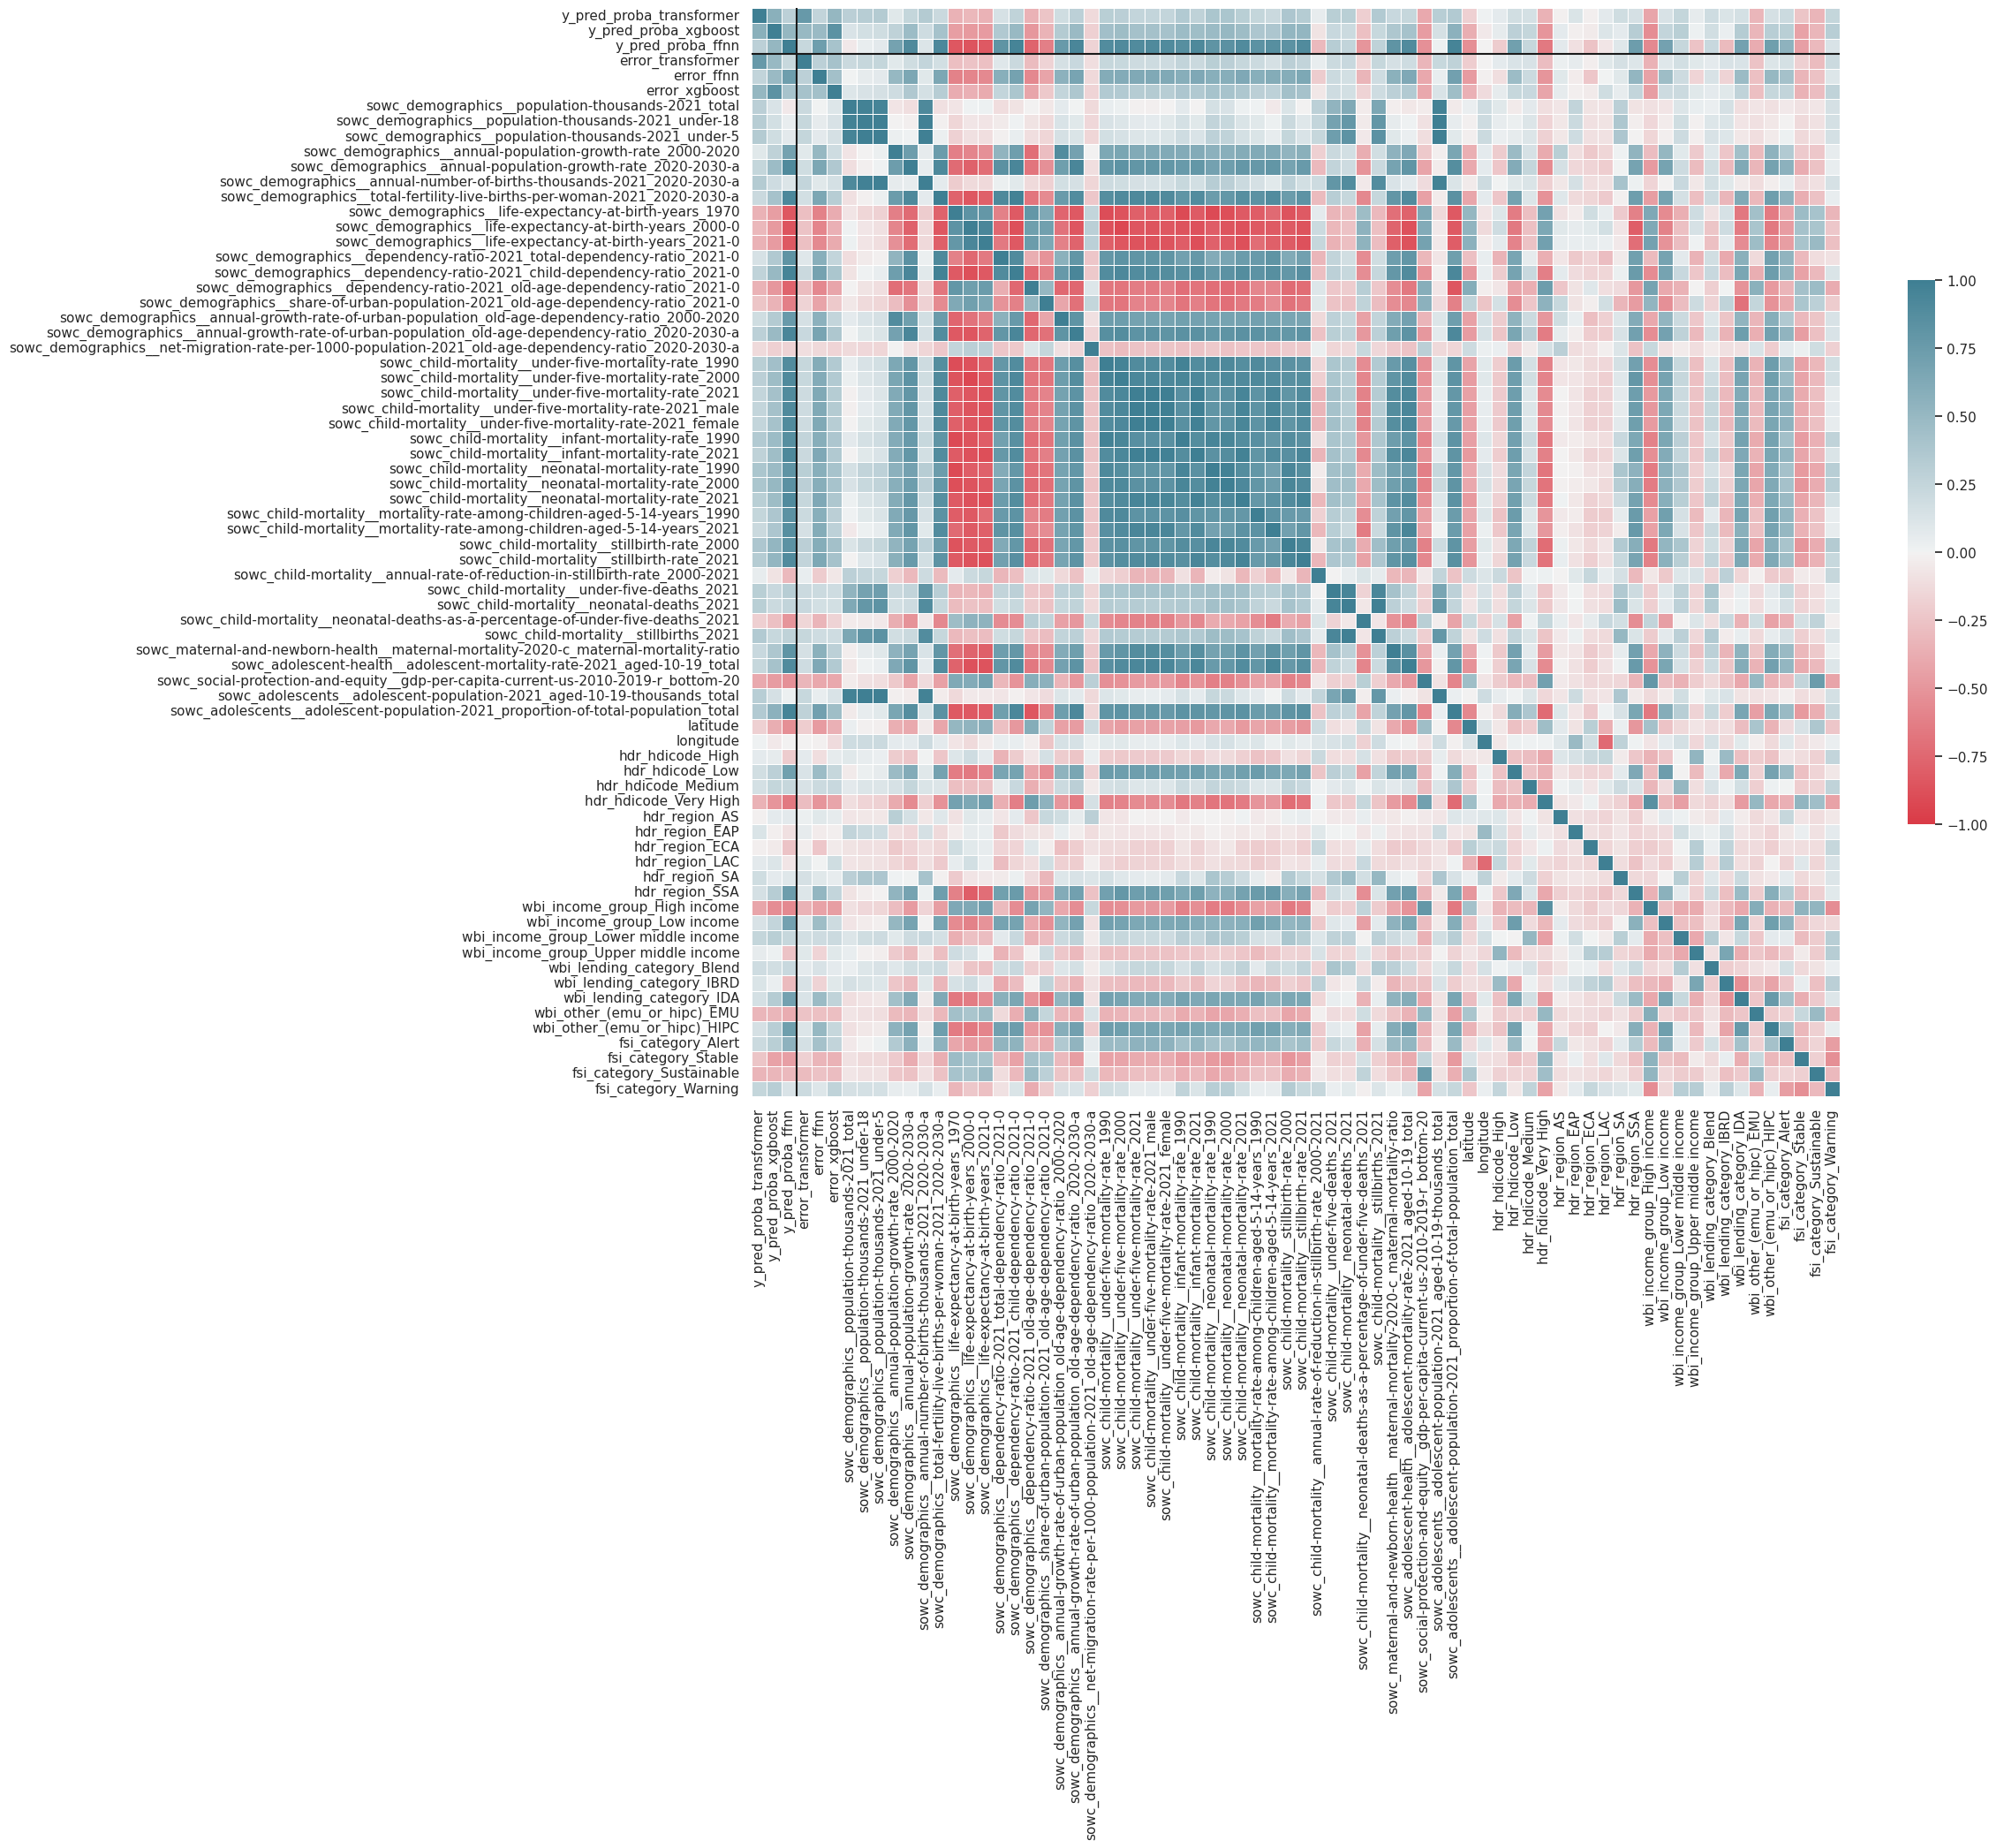

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

def corr_heatmap(df):
    # plot correlation heatmap based on code from:
    # https://medium.com/@nikolh92/helpful-visualisations-for-linear-regression-646a5648ad9d
    sns.set(style="white")
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=bool)
    #mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20, 16))
    cmap = sns.diverging_palette(10, 220, as_cmap=True)
    return sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True,
                       linewidths=.5, annot=False, cbar_kws={"shrink": .5})

corr_heatmap(df_oh)
_ = plt.axhline(y=3, c='k'); plt.axvline(x=3, c='k')

### Creating a disignmatrix

> In this step, the data will be converted into a design matrix. This design matrix will help us see the relations better and do calculations on the data.

In [50]:
reduced_oh_cols = [colname for colname in df_oh.columns if colname not in ['error_transformer',
                                                                           'error_ffnn',
                                                                           'error_xgboost',
                                                                           'y_pred_proba_transformer',
                                                                            'y_pred_proba_xgboost',
                                                                           'y_pred_proba_ffnn']]

# This will be used to make the (additional) indicator variables of which model a prediction corresponds to
df_oh['model_transformer'] = df_oh['error_transformer'].astype(str)*0+"transformer"
df_oh['model_ffnn'] = df_oh['error_ffnn'].astype(str)*0+"ffnn"
df_oh['model_xgboost'] = df_oh['error_xgboost'].astype(str)*0+"xgboost"

# The amount of error might change depending on if the prediction is positive or negative
# so this indicates if it was a postive or negative prediction
df_oh['prediction_transformer'] = df_raw.y_true_transformer.astype(int)
df_oh['prediction_ffnn'] = df_raw.y_pred_ffnn.astype(int)
df_oh['prediction_xgboost'] = df_raw.y_true_xgboost.astype(int)

df_oh.reset_index(inplace=True, drop=True)

# This "stacks" all the predictions together on top of each other so they can all be analyzed together:
# (make sure you understand what this is actually doing and why!)
design_matrix = \
pd.concat([df_oh[['error_transformer', 'model_transformer', 'prediction_transformer']+reduced_oh_cols].rename(columns={'error_transformer':'error','model_transformer':'model','prediction_transformer':'predicts1'}),
           df_oh[['error_ffnn', 'model_ffnn', 'prediction_ffnn']+reduced_oh_cols].rename(columns={'error_ffnn':'error','model_ffnn':'model','prediction_ffnn':'predicts1'}),
           df_oh[['error_xgboost', 'model_xgboost', 'prediction_xgboost']+reduced_oh_cols].rename(columns={'error_xgboost':'error','model_xgboost':'model','prediction_xgboost':'predicts1'})],
          ignore_index=True)
design_matrix

,error,model,predicts1,sowc_demographics__population-thousands-2021_total,sowc_demographics__population-thousands-2021_under-18,sowc_demographics__population-thousands-2021_under-5,sowc_demographics__annual-population-growth-rate_2000-2020,sowc_demographics__annual-population-growth-rate_2020-2030-a,sowc_demographics__annual-number-of-births-thousands-2021_2020-2030-a,sowc_demographics__total-fertility-live-births-per-woman-2021_2020-2030-a,...,wbi_income_group_Upper middle income,wbi_lending_category_Blend,wbi_lending_category_IBRD,wbi_lending_category_IDA,wbi_other_(emu_or_hipc)_EMU,wbi_other_(emu_or_hipc)_HIPC,fsi_category_Alert,fsi_category_Stable,fsi_category_Sustainable,fsi_category_Warning
0,0.183897,transformer,0,924.6095,316.0125,89.5255,0.478042,0.627259,17.943,2.4748,...,1,1,0,0,0,0,0,0,0,1
1,0.267831,transformer,0,924.6095,316.0125,89.5255,0.478042,0.627259,17.943,2.4748,...,1,1,0,0,0,0,0,0,0,1
2,0.482585,transformer,0,63588.3340,32079.2035,10537.3045,2.773574,2.572385,2303.114,4.7259,...,0,0,0,1,0,1,0,0,0,1
3,0.187792,transformer,0,63588.3340,32079.2035,10537.3045,2.773574,2.572385,2303.114,4.7259,...,0,0,0,1,0,1,0,0,0,1
4,0.460681,transformer,1,63588.3340,32079.2035,10537.3045,2.773574,2.572385,2303.114,4.7259,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0.079453,xgboost,0,627.8585,136.4175,36.8050,0.032267,0.106869,6.965,1.6914,...,1,0,1,0,0,0,0,1,0,0
1088,0.060189,xgboost,0,627.8585,136.4175,36.8050,0.032267,0.106869,6.965,1.6914,...,1,0,1,0,0,0,0,1,0,0
1089,0.302375,xgboost,1,1525.6630,353.2365,92.3225,0.622176,0.175209,17.814,1.6263,...,0,0,1,0,0,0,0,1,0,0
1090,0.729246,xgboost,0,1525.6630,353.2365,92.3225,0.622176,0.175209,17.814,1.6263,...,0,0,1,0,0,0,0,1,0,0


### Calculating possible cobminations

> The code bellow used teh variables in the design matrix to calculate possible relatiosn that the data could possibly have. The relation that is being created is between the model column and every other column that is available. This will help us have all possible relations and we can drop the unnecesary ones in the Training process.

In [51]:
# 0. design_matrix[reduced_oh_cols] effects at "baseline" (`ffnn` predicts 0)
design_matrix.predicts1 # is the intercept offset
for x in reduced_oh_cols:
    design_matrix[x+' X predicts1'] = design_matrix[x]*design_matrix['predicts1']

# 1. design_matrix[reduced_oh_cols]*predicts1 offset changes to "baseline" when prediction is 1

design_matrix.predicts1 # is the intercept offset
for x in reduced_oh_cols:
    design_matrix[x+' X predicts1'] = design_matrix[x]*design_matrix['predicts1']

# 2. design_matrix[reduced_oh_cols]*`transformer`/`xgboost` additional offset changes to "baseline"
# when prediction is made by `transformer`/`xgboost` for any prediction (0 or 1)
design_matrix['transformer'] = (design_matrix['model']=="transformer").astype(int) # intercept offset
design_matrix['xgboost'] = (design_matrix['model']=="xgboost").astype(int) # intercept offset
for x in reduced_oh_cols:
    design_matrix[x+' X transformer'] = design_matrix[x]*design_matrix['transformer']
    design_matrix[x+' X xgboost'] = design_matrix[x]*design_matrix['xgboost']

# 3. design_matrix[reduced_oh_cols]*`transformer_predicts1`/`xgboost_predicts1`
# additional offset changes to "baseline" for non `ffnn` 1 predictions
design_matrix['transformer X predicts1'] = design_matrix['transformer']*design_matrix['predicts1']
design_matrix['xgboost X predicts1'] = design_matrix['xgboost']*design_matrix['predicts1']
for x in reduced_oh_cols:
    design_matrix[x+' X transformer X predicts1'] = design_matrix[x]*design_matrix['transformer X predicts1']
    design_matrix[x+' X xgboost X predicts1'] = design_matrix[x]*design_matrix['xgboost X predicts1']

# This is to address the "DataFrame is highly fragmented" warning that's being flagged below
design_matrix = design_matrix.copy()
y = design_matrix['error']
del design_matrix['error']
del design_matrix['model']

design_matrix.head()#.columns

,predicts1,sowc_demographics__population-thousands-2021_total,sowc_demographics__population-thousands-2021_under-18,sowc_demographics__population-thousands-2021_under-5,sowc_demographics__annual-population-growth-rate_2000-2020,sowc_demographics__annual-population-growth-rate_2020-2030-a,sowc_demographics__annual-number-of-births-thousands-2021_2020-2030-a,sowc_demographics__total-fertility-live-births-per-woman-2021_2020-2030-a,sowc_demographics__life-expectancy-at-birth-years_1970,sowc_demographics__life-expectancy-at-birth-years_2000-0,...,wbi_other_(emu_or_hipc)_HIPC X transformer X predicts1,wbi_other_(emu_or_hipc)_HIPC X xgboost X predicts1,fsi_category_Alert X transformer X predicts1,fsi_category_Alert X xgboost X predicts1,fsi_category_Stable X transformer X predicts1,fsi_category_Stable X xgboost X predicts1,fsi_category_Sustainable X transformer X predicts1,fsi_category_Sustainable X xgboost X predicts1,fsi_category_Warning X transformer X predicts1,fsi_category_Warning X xgboost X predicts1
0,0,924.6095,316.0125,89.5255,0.478042,0.627259,17.943,2.4748,61.7130,66.3100,...,0,0,0,0,0,0,0,0,0,0
1,0,924.6095,316.0125,89.5255,0.478042,0.627259,17.943,2.4748,61.7130,66.3100,...,0,0,0,0,0,0,0,0,0,0
2,0,63588.3340,32079.2035,10537.3045,2.773574,2.572385,2303.114,4.7259,46.4495,52.3623,...,0,0,0,0,0,0,0,0,0,0
3,0,63588.3340,32079.2035,10537.3045,2.773574,2.572385,2303.114,4.7259,46.4495,52.3623,...,0,0,0,0,0,0,0,0,0,0
4,1,63588.3340,32079.2035,10537.3045,2.773574,2.572385,2303.114,4.7259,46.4495,52.3623,...,1,0,0,0,0,0,0,0,1,0


### Standardizing Data

> The last step in the data preperation is the standardize the data in the columns.  the formula for standardizing data is the following:
>
> ## $z = \frac{x - \mu}{\sigma}$
>
>
> * $z$: the standardized data
> * $x$: x is the raw data
> * $\mu$: the mean of the data
> * $\sigma$: the standard deviation of the data

In [52]:
# standardize the data

design_matrix = (design_matrix - design_matrix.mean()) / design_matrix.std()

# Create Regression Model
> In this section we will have to create multiple models to test their accuracy in the process. This is the most challenging part and we do not know the relationship between varuiables and we must use trial and error to find the best values. The value of the Condition Number (Cond. No.) is the value calculated by the models that identifies how multicolinear the models are. We want to aim for a condition number of below 30 to have reliabl data.

In [53]:
import statsmodels.api as sm

model_0_variables = design_matrix.columns.tolist()
design_matrix = design_matrix.apply(lambda col: col.astype(int) if col.dtype == bool else col)
model_0 = sm.OLS(y, sm.add_constant(design_matrix[model_0_variables]))
model_0.fit().summary().tables[-1]

Omnibus:,52.324,Durbin-Watson:,1.689
Prob(Omnibus):,0.000,Jarque-Bera (JB):,125.273
Skew:,0.250,Prob(JB):,6.27e-28
Kurtosis:,4.582,Cond. No.,2.26e+16


> The Condition Number of 2.26e+16 is really bad which means there is a lot of multicolinearity in teh data and the data can be improved. To fix this we will only be looking at the continous columns.

In [54]:
model_1_variables = [column for column in design_matrix.columns if design_matrix[column].nunique() > 135]
model_1 = sm.OLS(y, sm.add_constant(design_matrix[model_1_variables]))
model_1.fit().summary().tables[-1]

Omnibus:,25.710,Durbin-Watson:,1.819
Prob(Omnibus):,0.000,Jarque-Bera (JB):,37.013
Skew:,0.236,Prob(JB):,9.18e-09
Kurtosis:,3.769,Cond. No.,1.72e+06


### Filtering By P-Values

> The condition number definatly decreased but the value is still really high. To fix this issuse we will start removing the variables with the above acaptable p-values. The way this process wirks is we fit the model and remove the largest p-value. Then we repeat the same process again and again until all of our variables have a p-value of under `0.001`.

In [55]:
model_2_variables = model_1_variables.copy()

# Define a high threshold for p-value
p_value_threshold = 0.001

while True:
    X = design_matrix[model_2_variables]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Ge the p-values of the model's coefficients
    p_values = model.pvalues

    # Remove the variable with the highest p-value
    if p_values.max() > p_value_threshold:
        # Exclude the intercept's p-value
        p_values = p_values.drop('const')
        # Find the variable to remove
        variable_to_remove = p_values.idxmax()
        model_2_variables.remove(variable_to_remove)
    else:
        break

# Final set of variables after backward selection
model_2 = sm.OLS(y, sm.add_constant(design_matrix[model_2_variables]))
model_2.fit().summary().tables[-1]

Omnibus:,19.114,Durbin-Watson:,1.600
Prob(Omnibus):,0.000,Jarque-Bera (JB):,25.536
Skew:,0.202,Prob(JB):,2.85e-06
Kurtosis:,3.631,Cond. No.,93.1


### Removing Elements using Heat Map

> The Condition number so far is 93.1 which is way better than before but still, the equation is still colinear. To fix this issue, we will need to drop a selective number of variables to fix this issue.

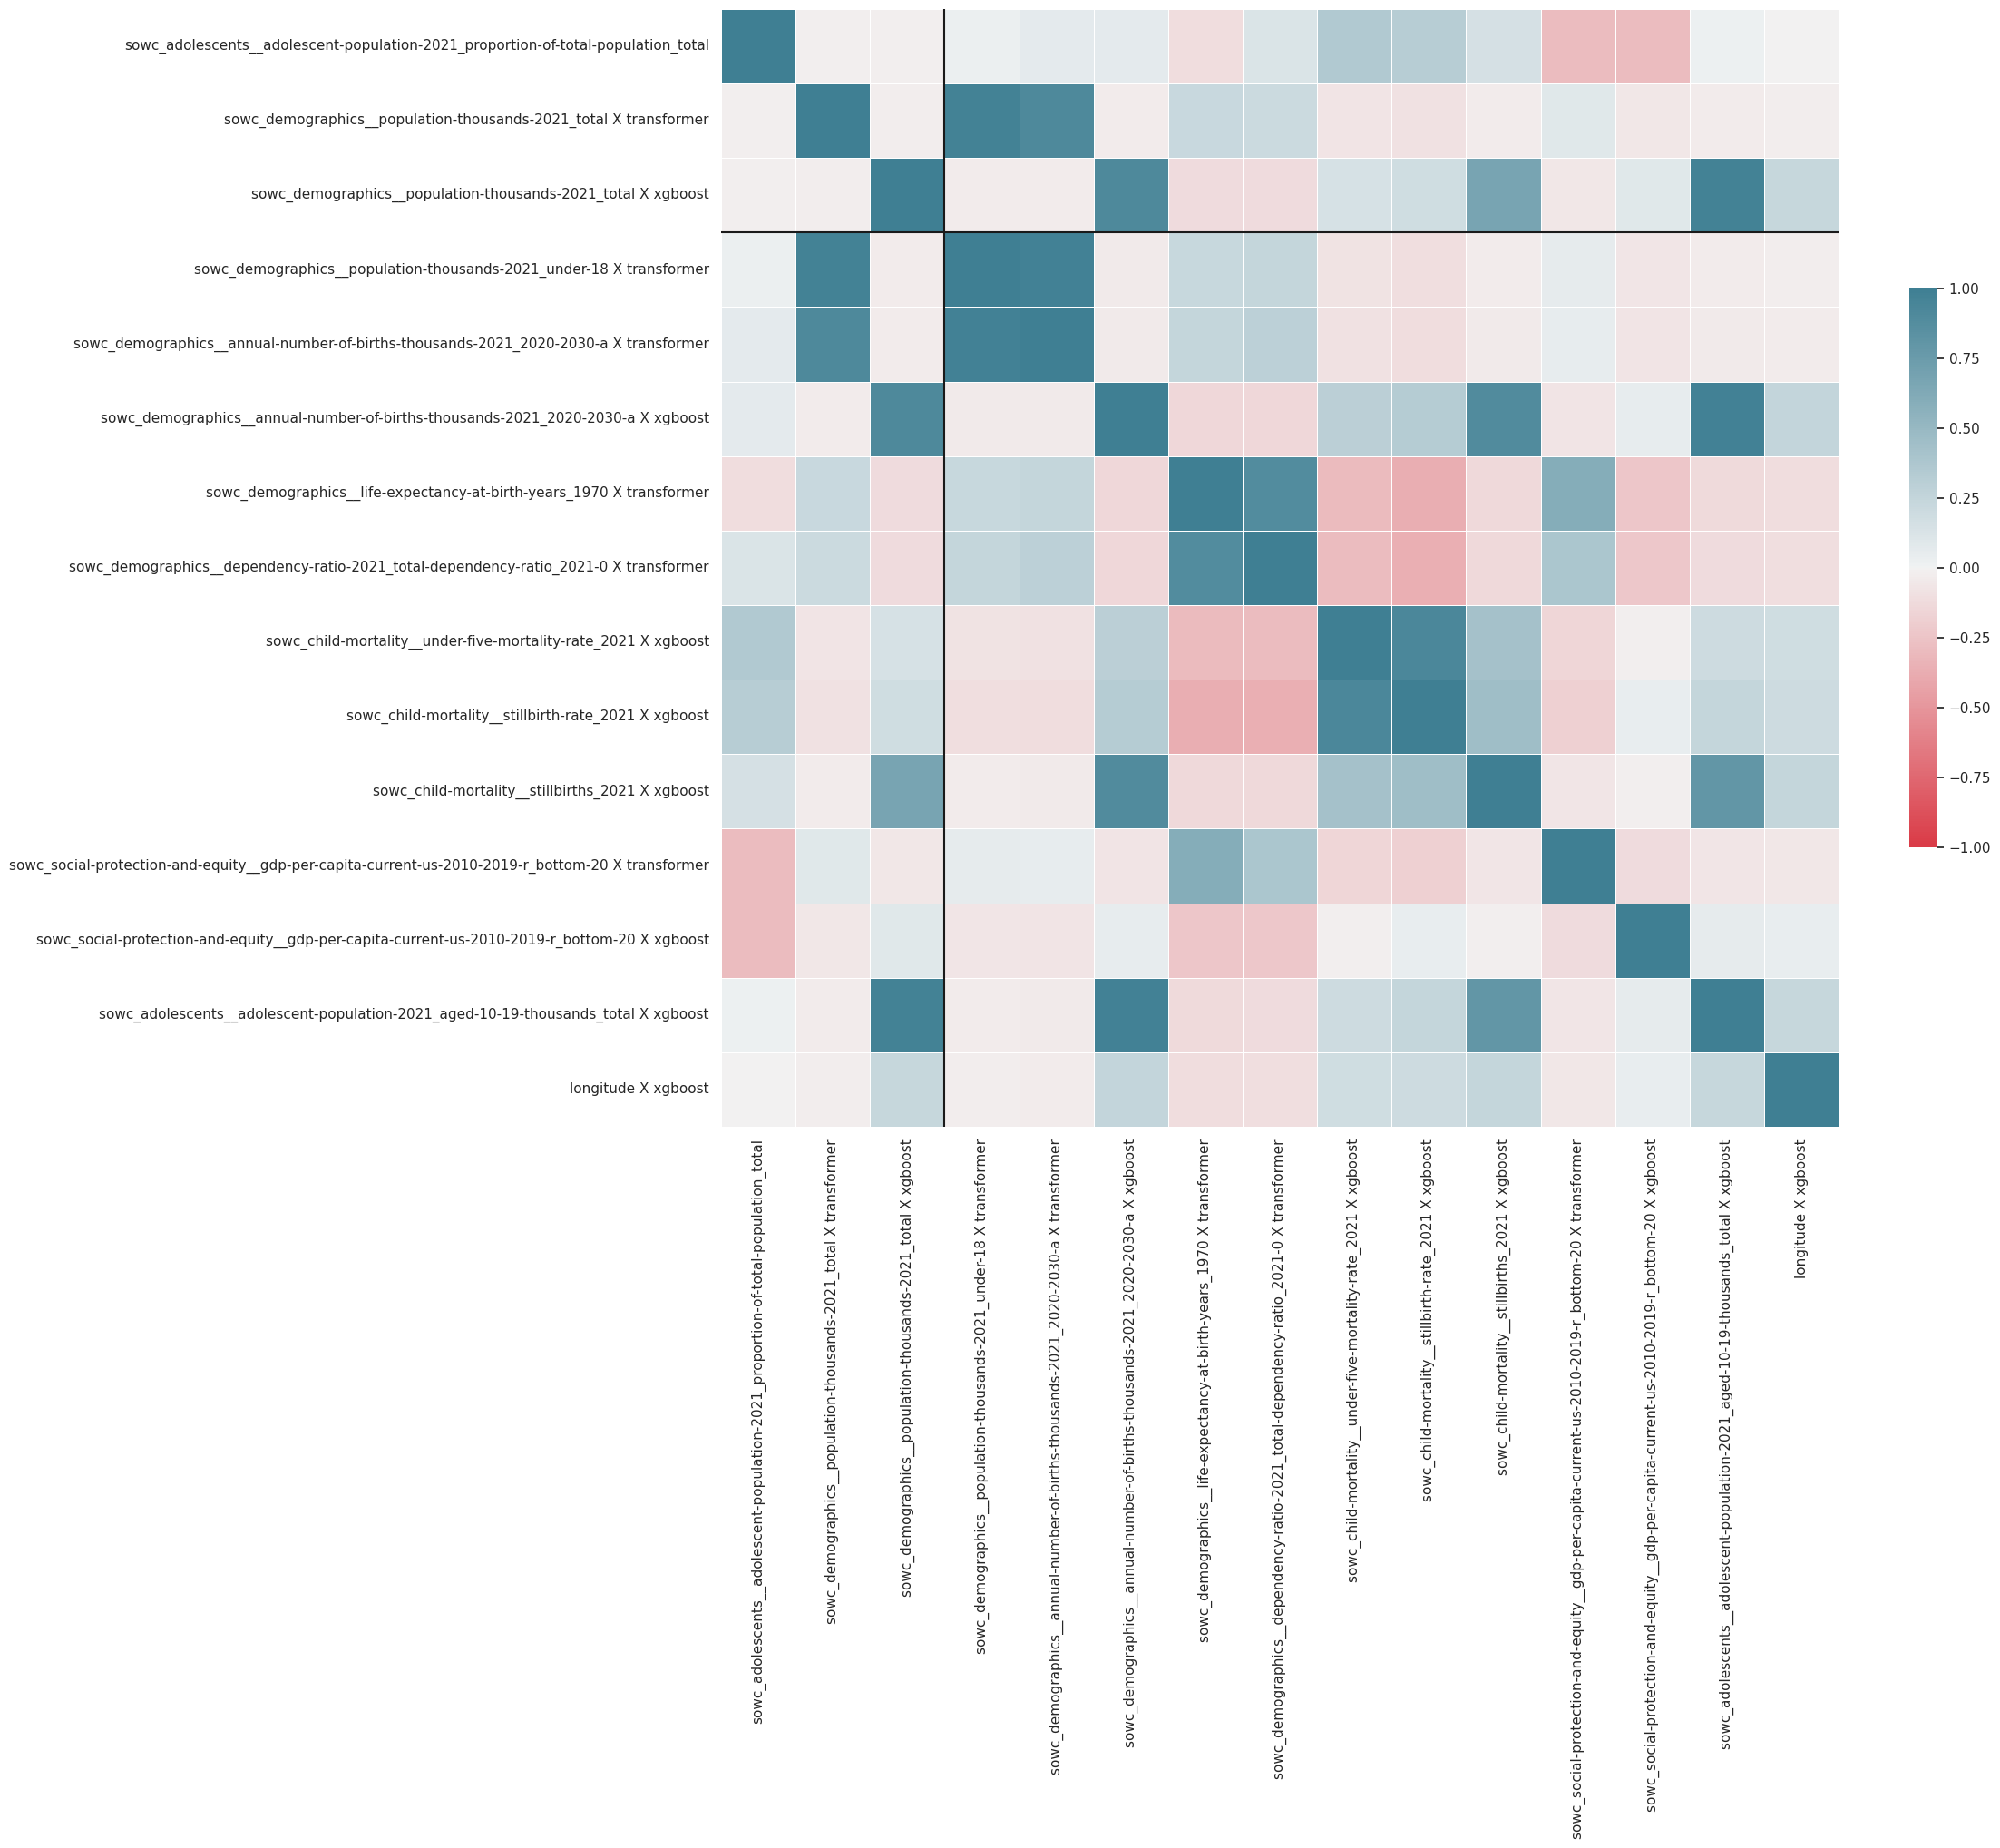

In [56]:
corr_heatmap(design_matrix[model_2_variables])
_ = plt.axhline(y=3, c='k'); plt.axvline(x=3, c='k')

> Nassed on the Heat Map This new model is generated which will be used for testing and then analysis.

In [57]:
model_3_variables = model_2_variables.copy()
model_3_variables.remove('sowc_demographics__population-thousands-2021_total X transformer')
model_3_variables.remove('sowc_demographics__population-thousands-2021_total X xgboost')
model_3_variables.remove('sowc_demographics__annual-number-of-births-thousands-2021_2020-2030-a X xgboost')
# model_3_variables.remove('sowc_social-protection-and-equity__gdp-per-capita-current-us-2010-2019-r_bottom-20 X xgboost')


while True:
    X = design_matrix[model_3_variables]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    # Ge the p-values of the model's coefficients
    p_values = model.pvalues

    # Remove the variable with the highest p-value
    if p_values.max() > p_value_threshold:
        # Exclude the intercept's p-value
        p_values = p_values.drop('const')
        # Find the variable to remove
        variable_to_remove = p_values.idxmax()
        model_3_variables.remove(variable_to_remove)
    else:
        break


model_3 = sm.OLS(y, sm.add_constant(design_matrix[model_3_variables]))
model_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  error   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     44.05
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.45e-67
Time:                        22:41:12   Log-Likelihood:                 504.19
No. Observations:                1092   AIC:                            -988.4
Df Residuals:                    1082   BIC:                            -938.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================================
                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                0.4345      0.005     93.723      0.000       0.425       0.444
sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total                    0.0695      0.006     11.035      0.000       0.057       0.082
sowc_demographics__population-thousands-2021_under-18 X transformer                                  0.0228      0.005      4.737      0.000       0.013       0.032
sowc_demographics__life-expectancy-at-birth-years_1970 X transformer                                 0.0617      0.014      4.457      0.000       0.035       0.089
sowc_demographics__dependency-ratio-2021_total-dependency-ratio_2021-0 X transformer                -0.0489      0.013     -3.878      0.000      -0.074      -0.024
sowc_child-mortality__stillbirth-rate_2021 X xgboost                                                 0.0229      0.006      4.036      0.000       0.012       0.034
sowc_social-protection-and-equity__gdp-per-capita-current-us-2010-2019-r_bottom-20 X transformer    -0.0237      0.006     -3.687      0.000      -0.036      -0.011
sowc_social-protection-and-equity__gdp-per-capita-current-us-2010-2019-r_bottom-20 X xgboost        -0.0202      0.005     -3.925      0.000      -0.030      -0.010
sowc_adolescents__adolescent-population-2021_aged-10-19-thousands_total X xgboost                    0.0182      0.005      3.717      0.000       0.009       0.028
longitude X xgboost                                                                                 -0.0203      0.005     -4.175      0.000      -0.030      -0.011
==============================================================================
Omnibus:                       23.822   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.608
Skew:                           0.310   Prob(JB):                     1.67e-06
Kurtosis:                       3.449   Cond. No.                         6.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Testting and Validation

> In this section we will be running a series of tests to see model accuracy on data that has not been trained on.

### Modeling Assumptions

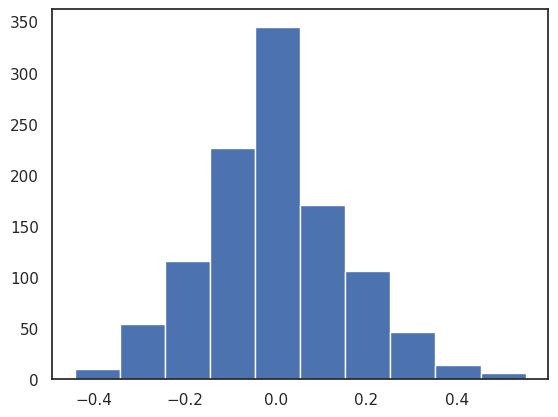

In [58]:
import matplotlib.pyplot as plt

_ = plt.hist(y-model_3.fit().predict())

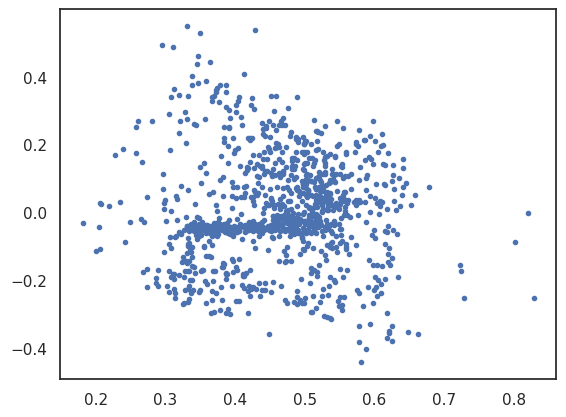

In [59]:
_ = plt.plot(model_3.fit().predict()+0.05*np.random.uniform(size=len(y)), y-model_3.fit().predict(), '.')

### Train-Test Validation

> In this section we will be spliting the data into train and test values and will use them to calculate the error in the models. As the error depends on what set of values the model is trined with we have desined a bootstrap sampling process where the code is ran 1000 times so we can find the average error for the data.

In [60]:
import plotly.express as px

reps = 1000

Bootstraped_RMSE_model_3_train = np.zeros(reps)
Bootstraped_RMSE_model_3_test = np.zeros(reps)

np.random.seed(130)

for i in range(reps):
  data_indices = np.random.choice(design_matrix.index, size=design_matrix.shape[0], replace=False)
  train_indices = design_matrix.sample(frac=.8, replace=False).index
  test_indices = design_matrix.index[~design_matrix.index.isin(train_indices)]
  model_3_train_test_fit = sm.OLS(y[train_indices], sm.add_constant(design_matrix.iloc[train_indices][model_3_variables])).fit()
  model_3_train_RMSE = ((y[train_indices] - model_3_train_test_fit.predict())**2).mean()**.5
  model_3_test_RMSE = ((y[test_indices] -
                        model_3_train_test_fit.predict(sm.add_constant(design_matrix.iloc[test_indices][model_3_variables]))
                      )**2).mean()**.5

  Bootstraped_RMSE_model_3_train[i] = model_3_train_RMSE
  Bootstraped_RMSE_model_3_test[i] = model_3_test_RMSE


#### Average Error for Train Data

In [61]:
df1 = pd.DataFrame({"Bootstraped_RMSE_model_3_train": Bootstraped_RMSE_model_3_train})
px.histogram(df1,x= "Bootstraped_RMSE_model_3_train")

#### Average Error for Test Data

In [62]:
df2 = pd.DataFrame({"Bootstraped_RMSE_model_3_test": Bootstraped_RMSE_model_3_test})
px.histogram(df2 ,x= "Bootstraped_RMSE_model_3_test")

#### Results of Bootstrapping

> In this dataframe you can see the mean error for the values as well as a 95 precent confodence interval to show the accuracy of the process.

In [63]:
model_3_RMSE_Values = pd.DataFrame()

model_3_RMSE_Values["Category"] = ["RMSE_train", "RMSE_test"]
model_3_RMSE_Values["Mean_RMSE"] = [np.round(Bootstraped_RMSE_model_3_train.mean(), 3), np.round(Bootstraped_RMSE_model_3_test.mean(), 3)]
model_3_RMSE_Values["confidence_interval_min"] = [np.round(np.quantile(Bootstraped_RMSE_model_3_train, [0.025, 0.975])[0], 3), np.round(np.quantile(Bootstraped_RMSE_model_3_test, [0.025, 0.975])[0], 3)]
model_3_RMSE_Values["confidence_interval_max"] = [np.round(np.quantile(Bootstraped_RMSE_model_3_train, [0.025, 0.975])[1], 3), np.round(np.quantile(Bootstraped_RMSE_model_3_test, [0.025, 0.975])[1], 3)]

model_3_RMSE_Values

,Category,Mean_RMSE,confidence_interval_min,confidence_interval_max
0,RMSE_train,0.152,0.149,0.156
1,RMSE_test,0.154,0.140,0.169


In [68]:
# np.random.seed(130)
train_size = 800
data_indices = np.random.choice(design_matrix.index, size=design_matrix.shape[0], replace=False)
train_indices = data_indices[train_size:]
test_indices = data_indices[:train_size]

model_1_train_test_fit = sm.OLS(y[train_indices], sm.add_constant(design_matrix.iloc[train_indices][model_1_variables])).fit()
model_1_train_RMSE = ((y[train_indices] - model_1_train_test_fit.predict())**2).mean()**.5
model_1_test_RMSE = ((y[test_indices] -
                      model_1_train_test_fit.predict(sm.add_constant(design_matrix.iloc[test_indices][model_1_variables]))
                     )**2).mean()**.5

model_2_train_test_fit = sm.OLS(y[train_indices], sm.add_constant(design_matrix.iloc[train_indices][model_2_variables])).fit()
model_2_train_RMSE = ((y[train_indices] - model_2_train_test_fit.predict())**2).mean()**.5
model_2_test_RMSE = ((y[test_indices] -
                      model_2_train_test_fit.predict(sm.add_constant(design_matrix.iloc[test_indices][model_2_variables]))
                     )**2).mean()**.5

model_3_train_test_fit = sm.OLS(y[train_indices], sm.add_constant(design_matrix.iloc[train_indices][model_3_variables])).fit()
model_3_train_RMSE = ((y[train_indices] - model_3_train_test_fit.predict())**2).mean()**.5
model_3_test_RMSE = ((y[test_indices] -
                      model_3_train_test_fit.predict(sm.add_constant(design_matrix.iloc[test_indices][model_3_variables]))
                     )**2).mean()**.5

import plotly.express as px
px.bar(pd.DataFrame({'RMSE': [model_1_train_RMSE, model_2_train_RMSE, model_3_train_RMSE] +
                             [model_1_test_RMSE, model_2_test_RMSE, model_3_test_RMSE],
                     'Score': ['Training']*3+['Testing']*3,
                     'Model': [1,2,3]+[1,2,3]}),
       y='RMSE', x='Model', color='Score', barmode='group')

# Result Analysis

> Now we will be sliting the equation into three pices so we can Analyze the Data



In [64]:
df_final_model = pd.DataFrame(model_3.fit().summary().tables[1])
df_final_model

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,0.4345,0.005,93.723,0.000,0.425,0.444
2,sowc_adolescents__adolescent-population-2021_p...,0.0695,0.006,11.035,0.000,0.057,0.082
3,sowc_demographics__population-thousands-2021_u...,0.0228,0.005,4.737,0.000,0.013,0.032
4,sowc_demographics__life-expectancy-at-birth-ye...,0.0617,0.014,4.457,0.000,0.035,0.089
5,sowc_demographics__dependency-ratio-2021_total...,-0.0489,0.013,-3.878,0.000,-0.074,-0.024
6,sowc_child-mortality__stillbirth-rate_2021 X x...,0.0229,0.006,4.036,0.000,0.012,0.034
7,sowc_social-protection-and-equity__gdp-per-cap...,-0.0237,0.006,-3.687,0.000,-0.036,-0.011
8,sowc_social-protection-and-equity__gdp-per-cap...,-0.0202,0.005,-3.925,0.000,-0.030,-0.010
9,sowc_adolescents__adolescent-population-2021_a...,0.0182,0.005,3.717,0.000,0.009,0.028


$E_{ffnn} = 0.4345 + 0.0695 * \text{sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total}$


$E_{xgboost} = 0.4345 + 0.0695 * \text{sowc_adolescents__adolescent-population-2021_proportion-of-total-population_total} + 0.0229 * \text{sowc_child-mortality__stillbirth-rate_2021 X xgboost}+ 0.0202*\text{sowc_social-protection-and-equity__gdp-per-capita-current-us-2010-2019-r_bottom-20 X xgboost} + -0.0202	* \text{sowc_social-protection-and-equity__gdp-per-capita-current-us-2010-2019-r_bottom-20 X xgboost}$

In [65]:
df_ffnn_error = df_final_model.iloc[[1, 2]]

df_ffnn_error

,0,1,2,3,4,5,6
1,const,0.4345,0.005,93.723,0.000,0.425,0.444
2,sowc_adolescents__adolescent-population-2021_p...,0.0695,0.006,11.035,0.000,0.057,0.082


> The equation above shows that The minimum error the FFNN modle can have is 0.4345 and this value could also increase depening on the adolescent-population, typically refered to children between the ages of 10 to 19. The lower this value is the better the model will perform.

In [66]:
df_transformer_error = df_final_model.iloc[[1, 2, 3, 4, 5, 7]]

df_transformer_error

,0,1,2,3,4,5,6
1,const,0.4345,0.005,93.723,0.000,0.425,0.444
2,sowc_adolescents__adolescent-population-2021_p...,0.0695,0.006,11.035,0.000,0.057,0.082
3,sowc_demographics__population-thousands-2021_u...,0.0228,0.005,4.737,0.000,0.013,0.032
4,sowc_demographics__life-expectancy-at-birth-ye...,0.0617,0.014,4.457,0.000,0.035,0.089
5,sowc_demographics__dependency-ratio-2021_total...,-0.0489,0.013,-3.878,0.000,-0.074,-0.024
7,sowc_social-protection-and-equity__gdp-per-cap...,-0.0237,0.006,-3.687,0.000,-0.036,-0.011


> For the transformer model, there are a lot of factors that have to be considered that increase this error such as population under 18 and life expectancy at birth. However there are also factors that decrease the error of this model. Such as the total_dependancy_ratio of the population and the gdp per capita in USD.

In [67]:
df_xgboost_error = df_final_model.iloc[[1, 2, 6, 8, 9, 10]]

df_xgboost_error

,0,1,2,3,4,5,6
1,const,0.4345,0.005,93.723,0.000,0.425,0.444
2,sowc_adolescents__adolescent-population-2021_p...,0.0695,0.006,11.035,0.000,0.057,0.082
6,sowc_child-mortality__stillbirth-rate_2021 X x...,0.0229,0.006,4.036,0.000,0.012,0.034
8,sowc_social-protection-and-equity__gdp-per-cap...,-0.0202,0.005,-3.925,0.000,-0.030,-0.010
9,sowc_adolescents__adolescent-population-2021_a...,0.0182,0.005,3.717,0.000,0.009,0.028
10,longitude X xgboost,-0.0203,0.005,-4.175,0.000,-0.030,-0.011


> This model also Has intersting results. Factors that also decrease the error of this model are the GDO_per_capita in USD and the longitude of the countires. The higher these two factors are the more accurate this model is.